In [1]:
# Import dependencies and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
import json
import hvplot.pandas

# Import API key
from config import geoapify_key

from pprint import pprint

In [2]:
# Investigate the structure of each dataset
# Handle missing values, duplicates, and any inconsistencies
# Standardize column names if needed
# Ensure compatibility of data types

In [3]:
# Load datasets into pandas dataframes
csv_path = "Resources/abs_stats.csv"
gender_region_df = pd.read_csv(csv_path)

csv_path2 = "Resources/life_expectancy_data.csv"
life_expect_df = pd.read_csv(csv_path2)

csv_shawn1 = "Resources/Life expectancy at birth, males.csv"
life_males_states_df = pd.read_csv(csv_shawn1)

csv_shawn2 = "Resources/Life expectancy at birth, females.csv"
life_females_states_df = pd.read_csv(csv_shawn2)

csv_shawn3 = "Resources/Australian Population.csv"
state_population_df = pd.read_csv(csv_shawn3)

In [4]:
# Task (Aleksandra): Filter and analyze data related to gender and life expectancy

# Perform analysis and visualize the relationship


In [5]:
# Task (Rachel): Filter and analyze data related to health expenditure and life expectancy

# Perform analysis and visualize the relationship


In [6]:
life_expect_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
# Task (Shawn) Filter and analyze data related to residency location and life expectancy
gender_region_cleaned = gender_region_df.dropna()
shawn_df = life_expect_df
shawn_df = shawn_df.rename(columns={'Life expectancy ': 'Life expectancy'})
# Perform analysis and visualize the relationship

def select_data(year, status):
    selected_life = shawn_df.loc[((shawn_df["Year"] == year) & (shawn_df["Status"] == status)), 'Life expectancy']
    selected_gdp = shawn_df.loc[((shawn_df["Year"] == year) & (shawn_df["Status"] == status)), 'GDP']
    return selected_life, selected_gdp

def meanlife(year, status):
    life, gdp = select_data(year, status)
    return life.mean(), gdp.mean()

total_years = []
developing_lifedata = []
developing_lifemean = []
developed_lifemean = []
developed_lifedata = []
developing_gdpmean = []
developed_gdpmean = []

for i in range (2000,2016):
    total_years.append(i)

    developing_life, developing_gdp = select_data(i, "Developing")
    developed_life, developed_gdp = select_data(i, "Developed")

    developing_lifem, developing_gdpm = meanlife(i, "Developing")
    developed_lifem, developed_gdpm = meanlife(i, "Developed")

    developing_lifedata.append(developing_life)
    developed_lifedata.append(developed_life)

    developing_lifemean.append(developing_lifem)
    developed_lifemean.append(developed_lifem)

    developing_gdpmean.append(developing_gdpm)
    developed_gdpmean.append(developed_gdpm)


status_life_expect = pd.DataFrame({"Year": total_years,
                                   "Average Life Expectancy(Developing)": developing_lifemean,
                                   "Average Life Expectancy(Developed)": developed_lifemean,
                                   "Average GDP per capita(Developing)": developing_gdpmean,
                                   "Average GDP per capita(Developed)": developed_gdpmean,
                                   })
status_life_expect

,Year,Average Life Expectancy(Developing),Average Life Expectancy(Developed),Average GDP per capita(Developing),Average GDP per capita(Developed)
0,2000,64.619868,76.803125,2373.557362,15215.825425
1,2001,65.009934,77.128125,2389.128353,16036.874398
2,2002,65.190728,77.546875,2587.546652,13724.055247
3,2003,65.206623,77.940625,3082.831620,12449.282651
4,2004,65.370861,78.384375,3697.237869,22409.726689
5,2005,66.009272,78.590625,3992.927805,22138.289277
6,2006,66.450331,79.131250,3332.083049,25701.090716
7,2007,66.860927,79.300000,4212.411736,28307.900841
8,2008,67.413907,78.931250,5455.231527,34141.452187
9,2009,67.894040,79.584375,4257.739033,19873.762400


In [8]:
"""
Insights:
Based on World Health Organization(WHO), most countries' status are classified as Developing or Developed.
The start of the analysis from research the relatiohship between life expectancy and country status.
From 2000 to 2015, developed countries have higher life expectancy than developing countries each year.
Also, developed countries have higher GDP per capita each year.
"""

"\nInsights:\nBased on World Health Organization(WHO), most countries' status are classified as Developing or Developed.\nThe start of the analysis from research the relatiohship between life expectancy and country status.\nFrom 2000 to 2015, developed countries have higher life expectancy than developing countries each year.\nAlso, developed countries have higher GDP per capita each year.\n"

The p-value of average life expectancy between developed and developing countries is 7.093327429544901e-23


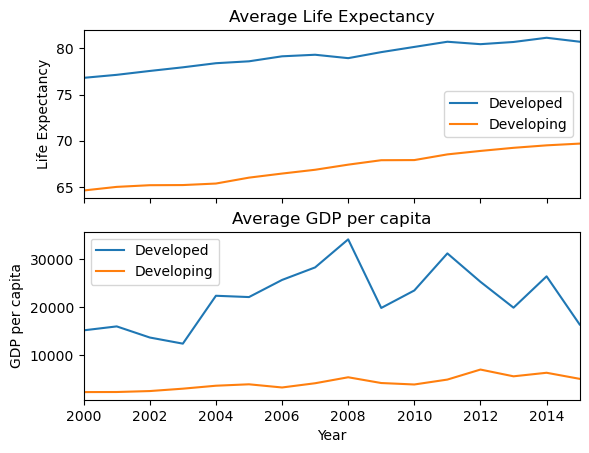

In [9]:
life_statistic, life_pvalue = stats.ttest_ind(developed_life, developing_life, equal_var=False)
print(f"The p-value of average life expectancy between developed and developing countries is {life_pvalue}")


fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.set_xlim(min(total_years), max(total_years))
ax1.plot(total_years, developed_lifemean, label="Developed")
ax1.plot(total_years, developing_lifemean, label="Developing")
ax1.set_title("Average Life Expectancy")
ax1.set_ylabel("Life Expectancy")
ax1.legend()

ax2.plot(total_years, developed_gdpmean, label="Developed")
ax2.plot(total_years, developing_gdpmean, label="Developing")
ax2.set_title("Average GDP per capita")
ax2.set_ylabel("GDP per capita")
ax2.set_xlabel("Year")
ax2.legend()

plt.show()

In [10]:
"""
Insights:
The p value is much lower than 0.05, which indicates that the relationship between life expectancy and country status is statistically significant. 
Thus we can reject the null hypothesis, and get the conclusion that average life expectancy is higher in developed countries that are classified by the World Health Organization
And from the graph, we can tell that, developed countries have much higher average GDP than developing countries.
"""

'\nInsights:\nThe p value is much lower than 0.05, which indicates that the relationship between life expectancy and country status is statistically significant. \nThus we can reject the null hypothesis, and get the conclusion that average life expectancy is higher in developed countries that are classified by the World Health Organization\nAnd from the graph, we can tell that, developed countries have much higher average GDP than developing countries.\n'

In [11]:
#all developed countries
asia_dped = ["Singapore", "Republic of Korea", "Japan"]
europe_dped = ["Germany", "Spain", "Poland", "Italy", "Netherlands", "Norway"]
namerica_dped = ["United States of America"]
ocean_dped = ["Australia", "New Zealand"]

#all developing countries
asia_dping = ["India", "Thailand", "Indonesia","United Arab Emirates", "Saudi Arabia", "China"]
europe_dping = ["Greece", "France","Russian Federation", "Finland", "Turkey", "Albania"]
africa_dping = ["South Africa", "Nigeria", "Morocco", "Algeria", "Egypt", "Ghana"]
namerica_dping = ["Mexico", "Jamaica", "Cuba", "Panama", "Costa Rica", "Haiti"]
samerica_dping = ["Brazil", "Argentina", "Peru", "Colombia", "Chile", "Uruguay"]

all_countries = [asia_dped, asia_dping, europe_dped, europe_dping, africa_dping, namerica_dped, namerica_dping, ocean_dped, samerica_dping]
country_labels = ["Developed Asian", "Developing Asian", "Developed Europe", "Developing Europe", "Developing Africa", 
                  "Developed North America", "Developing North America", "Developed Oceania", "Developing South America"]
#copy_df = life_expect_df

meanlist_2000=[]
meanlist_2015=[]
mylist=[]

In [12]:
def meangroup_2000(group):
    templist=[]
    for country in group:
        temp = shawn_df.loc[((shawn_df['Country']==country) & (shawn_df['Year'] == 2000)), 'Life expectancy']
        templist.append(temp)
    return round(np.average(templist),2)

def meangroup_2015(group):
    templist=[]
    for country in group:
        temp = shawn_df.loc[((life_expect_df['Country']==country) & (shawn_df['Year'] == 2015)), 'Life expectancy']
        templist.append(temp)
    return round(np.average(templist),2)

for group in all_countries:
    meanlist_2000.append(meangroup_2000(group))
    meanlist_2015.append(meangroup_2015(group))


mylist = zip(country_labels, meanlist_2000, meanlist_2015)

countrygroup_df = pd.DataFrame(mylist, columns=['Country Groups', 'Average Life Expectancy 2000', 'Average Life Expectancy 2015'])
countrygroup_df

,Country Groups,Average Life Expectancy 2000,Average Life Expectancy 2015
0,Developed Asian,78.47,83.03
1,Developing Asian,69.73,73.33
2,Developed Europe,77.80,81.28
3,Developing Europe,74.35,78.85
4,Developing Africa,61.72,68.12
5,Developed North America,76.80,79.30
6,Developing North America,72.70,75.48
7,Developed Oceania,79.05,82.20
8,Developing South America,74.05,77.27


In [13]:
"""
Insights:
To further analyze the data, I mannually pick developed and developing countries from each continent, and put them in corresponding groups.
This analysis is to show the relationship between life expectancy and residency continents.
Thus I put countries in control groups, for example Asian Developed Countries, Asian Developing Countries, Europe Developed Countries, etc.
The first step I take is to calculate the average life expectancy data in 2000 and 2015, this table shows that, despite residency continent and country status,
the average life expectancy increases through time. That might indicates that time is much stronger influencer than residency location.
But my topic is life expectancy vs residency locations, so moving on.
"""

'\nInsights:\nTo further analyze the data, I mannually pick developed and developing countries from each continent, and put them in corresponding groups.\nThis analysis is to show the relationship between life expectancy and residency continents.\nThus I put countries in control groups, for example Asian Developed Countries, Asian Developing Countries, Europe Developed Countries, etc.\nThe first step I take is to calculate the average life expectancy data in 2000 and 2015, this table shows that, despite residency continent and country status,\nthe average life expectancy increases through time. That might indicates that time is much stronger influencer than residency location.\nBut my topic is life expectancy vs residency locations, so moving on.\n'

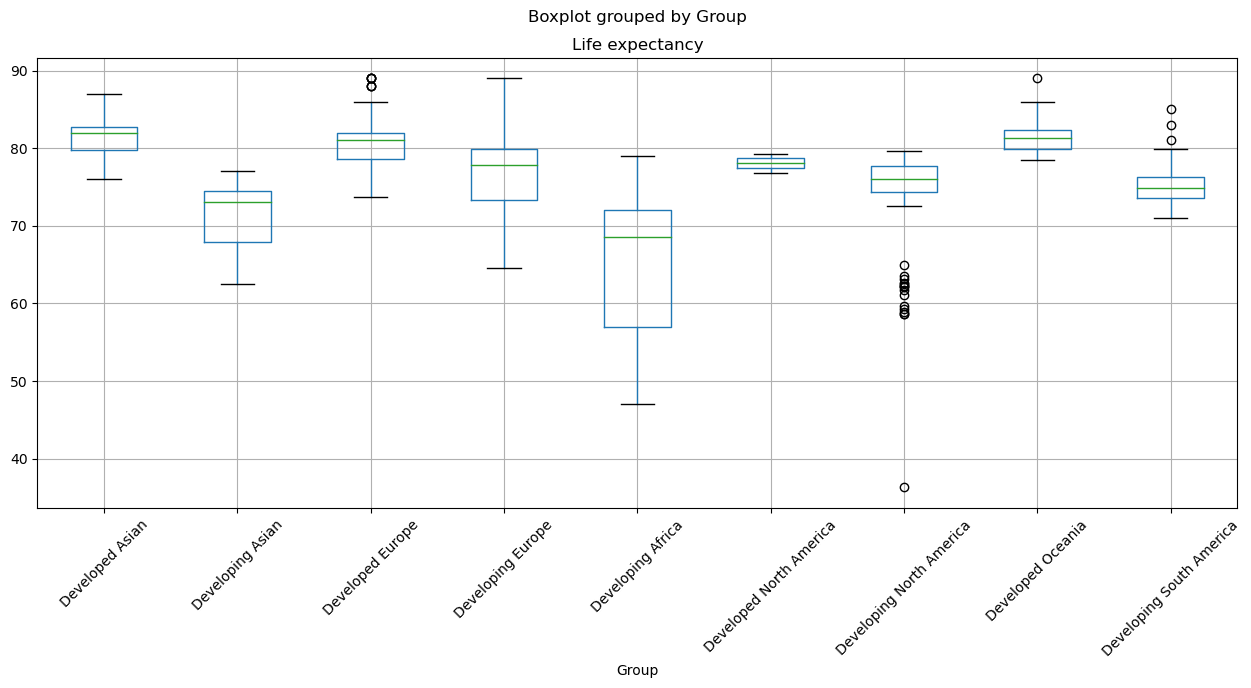

In [14]:
copy_df = shawn_df
for group_label, group in enumerate(all_countries, start=1):
    copy_df.loc[copy_df['Country'].isin(group), 'Group'] = f"Group_{group_label}"

cleaned_df = copy_df[copy_df['Group'].notna()]
selected_df = cleaned_df[['Group', 'Life expectancy']].copy()
ax = selected_df.boxplot("Life expectancy", by="Group", figsize=(15,6), rot=45)
ax.set_xticklabels(country_labels)
plt.show()

In [15]:
"""
Insights:
This time, I take life expectancy data from every year between 2000 and 2015, and save them in corresponding groups.
These data are used to draw boxplot, the purpose is to check the consistancy of the data.
And I found out that developing north america group has way too many outliers, I believe this group's data is not consistent. 
Their data might be influenced by something else like war, natural hazard, disease, etc.
Thus I will not using their data in the further analysis.
"""

"\nInsights:\nThis time, I take life expectancy data from every year between 2000 and 2015, and save them in corresponding groups.\nThese data are used to draw boxplot, the purpose is to check the consistancy of the data.\nAnd I found out that developing north america group has way too many outliers, I believe this group's data is not consistent. \nTheir data might be influenced by something else like war, natural hazard, disease, etc.\nThus I will not using their data in the further analysis.\n"

In [16]:

grouplist = []
for i in range (1,10):
    grouplist.append(selected_df[selected_df["Group"] == f"Group_{i}"]["Life expectancy"])
    
s_temp, dped_countries = stats.f_oneway(grouplist[0], grouplist[2], grouplist[5], grouplist[7])
#not using developing north america data
s_temp2, dping_countries = stats.f_oneway(grouplist[1], grouplist[3], grouplist[4], grouplist[8])
print(f"The p value of life expectancy between developed countries is {dped_countries}")
print(f"The p value of life expectancy between developing countries is {dping_countries}")

print("----------------------------------------------------------------------------------------")
s_temp3, dped_countries_cleaned = stats.f_oneway(grouplist[0], grouplist[2], grouplist[7])
print(f"After kicked out North America, The p value of life expectancy between developed countries is {dped_countries_cleaned}")

print("----------------------------------------------------------------------------------------")
s_1, ae_p = stats.ttest_ind(grouplist[1], grouplist[3], equal_var=False)
print(f"The p value of life expectancy between Asian and Europe developing countries is {ae_p}")
print(f"the average life expectancy in Asia is {round(np.average(grouplist[1]),2)}")
print(f"the average life expectancy in Europe is {round(np.average(grouplist[3]),2)}")

print("----------------------------------------------------------------------------------------")
s_1, ae_p = stats.ttest_ind(grouplist[4], grouplist[8], equal_var=False)
print(f"The p value of life expectancy between Asian and Europe developing countries is {ae_p}")
print(f"the average life expectancy in Africa is {round(np.average(grouplist[4]),2)}")
print(f"the average life expectancy in South America is {round(np.average(grouplist[8]),2)}")

print("----------------------------------------------------------------------------------------")
s_1, ae_p = stats.ttest_ind(grouplist[3], grouplist[8], equal_var=False)
print(f"The p value of life expectancy between Europe and South America developing countries is {ae_p}")
print(f"the average life expectancy in Europe is {round(np.average(grouplist[3]),2)}")
print(f"the average life expectancy in South America is {round(np.average(grouplist[8]),2)}")

The p value of life expectancy between developed countries is 0.0003549620276792843
The p value of life expectancy between developing countries is 1.1726226262612808e-41
----------------------------------------------------------------------------------------
After kicked out North America, The p value of life expectancy between developed countries is 0.1727207241146913
----------------------------------------------------------------------------------------
The p value of life expectancy between Asian and Europe developing countries is 9.880141907641241e-12
the average life expectancy in Asia is 71.58
the average life expectancy in Europe is 76.83
----------------------------------------------------------------------------------------
The p value of life expectancy between Asian and Europe developing countries is 8.7229818792176e-20
the average life expectancy in Africa is 64.5
the average life expectancy in South America is 75.17
--------------------------------------------------------

In [17]:
"""
Insights:
the printed out information is my ANOVA and T-Test results.
The first step is to check the life expectancy relationship between developed/developing countries from different continent.
Both P values are lower than 0.05, but the p value of developed countries is actually not that small.
I digged into the data, and from the previous table, we can tell that North American Countries (US) has much lower life expectancy than other developed countries 
Thus I kick out NA, and ran the ANOVA test again between, Asia, Europe, and Oceania countries. The p-value is 0.172 which is much higher than 0.05, 
that indicates a null hypothesis is retained. That means, developed countries from Aisa, Europe and Oceania all have similar life expectancy. 
That shows that in developed world, US has the worst life expectancy.
I further put the developing groups in a tournament style format to run T test. The semi finals are Asia vs Europe, Africa vs South America. 
The P values of both tests are all lower than 0.05, and I further print out each group's average life expectancy. 
We can tell that, in developing world, Europe is a better place than Asia, and South America is better than Africa.
The final is between Europe and South America, the p-value is lower than 0.05 but higher than 0.01, that means the relationship is not super strong.
Europe is winning by a small margin, but I would say South America is only behind by a litte bit.
"""

"\nInsights:\nthe printed out information is my ANOVA and T-Test results.\nThe first step is to check the life expectancy relationship between developed/developing countries from different continent.\nBoth P values are lower than 0.05, but the p value of developed countries is actually not that small.\nI digged into the data, and from the previous table, we can tell that North American Countries (US) has much lower life expectancy than other developed countries \nThus I kick out NA, and ran the ANOVA test again between, Asia, Europe, and Oceania countries. The p-value is 0.172 which is much higher than 0.05, \nthat indicates a null hypothesis is retained. That means, developed countries from Aisa, Europe and Oceania all have similar life expectancy. \nThat shows that in developed world, US has the worst life expectancy.\nI further put the developing groups in a tournament style format to run T test. The semi finals are Asia vs Europe, Africa vs South America. \nThe P values of both tes

In [18]:
merge_df = pd.merge(life_males_states_df, life_females_states_df, on='State or territory')
state_df = merge_df[['State or territory', '2020-2022_x', '2020-2022_y']].copy()
state_df = state_df.rename(columns={"2020-2022_x":"Male Life Expectancy", "2020-2022_y":"Female Life Expectancy"})
state_df

,State or territory,Male Life Expectancy,Female Life Expectancy
0,NSW,81.3,85.3
1,Vic,81.6,85.5
2,Qld,80.7,85.0
3,SA,81.0,85.1
4,WA,81.7,85.8
5,Tas,80.3,84.3
6,NT,76.2,80.7
7,ACT,82.2,86.0


In [19]:
state_df["lat1"] = ''
state_df["lat2"] = ''
state_df["lon1"] = ''
state_df["lon2"] = ''
state_df['center lat'] = ''
state_df['center lon'] = ''
state_df['Person Life Expectancy'] = ''

params = {
    "apiKey":geoapify_key,
    "format":"json"
}

state_df
    

,State or territory,Male Life Expectancy,Female Life Expectancy,lat1,lat2,lon1,lon2,center lat,center lon,Person Life Expectancy
0,NSW,81.3,85.3,,,,,,,
1,Vic,81.6,85.5,,,,,,,
2,Qld,80.7,85.0,,,,,,,
3,SA,81.0,85.1,,,,,,,
4,WA,81.7,85.8,,,,,,,
5,Tas,80.3,84.3,,,,,,,
6,NT,76.2,80.7,,,,,,,
7,ACT,82.2,86.0,,,,,,,


In [20]:
for index, row in state_df.iterrows():

    state = row["State or territory"] + ",  Australia"
    params["text"] = f"{state}"

    # Set the base URL
    base_url = "https://api.geoapify.com/v1/geocode/search"

    response = requests.get(base_url, params=params)
    response = response.json()

    state_df.loc[index, "Person Life Expectancy"] = (state_df.loc[index, "Male Life Expectancy"] + state_df.loc[index, "Female Life Expectancy"])/2

    try:
        state_df.loc[index, "lat1"] = response["results"][0]["bbox"]["lat1"]
        state_df.loc[index, "lat2"] = response["results"][0]["bbox"]["lat2"]
        state_df.loc[index, "lon1"] = response["results"][0]["bbox"]["lon1"]
        state_df.loc[index, "lon2"] = response["results"][0]["bbox"]["lon2"]
        state_df.loc[index, "center lat"] = (response["results"][0]["bbox"]["lat1"] + response["results"][0]["bbox"]["lat2"])/2
        state_df.loc[index, "center lon"] = (response["results"][0]["bbox"]["lon1"] + response["results"][0]["bbox"]["lon2"])/2
    except IndexError:
        print("lat and lon not found")

state_df

lat and lon not found
lat and lon not found
lat and lon not found


,State or territory,Male Life Expectancy,Female Life Expectancy,lat1,lat2,lon1,lon2,center lat,center lon,Person Life Expectancy
0,NSW,81.3,85.3,-37.528014,-28.141526,140.999265,159.339031,-32.83477,150.169148,83.3
1,Vic,81.6,85.5,-39.198487,-33.980797,140.961902,150.033282,-36.589642,145.497592,83.55
2,Qld,80.7,85.0,-29.179266,-9.088012,137.994646,153.611604,-19.133639,145.803125,82.85
3,SA,81.0,85.1,,,,,,,83.05
4,WA,81.7,85.8,,,,,,,83.75
5,Tas,80.3,84.3,-55.173054,-39.198478,143.748821,159.084083,-47.185766,151.416452,82.3
6,NT,76.2,80.7,,,,,,,78.45
7,ACT,82.2,86.0,-35.920762,-35.124517,148.762675,149.399285,-35.522639,149.08098,84.1


In [21]:
def query(city, index):
    cityname = city + ",  Australia"
    params["text"] = f"{cityname}"

    response = requests.get(base_url, params=params)
    response = response.json()
    
    state_df.loc[index, "lat1"] = response["results"][0]["bbox"]["lat1"]
    state_df.loc[index, "lat2"] = response["results"][0]["bbox"]["lat2"]
    state_df.loc[index, "lon1"] = response["results"][0]["bbox"]["lon1"]
    state_df.loc[index, "lon2"] = response["results"][0]["bbox"]["lon2"]
    state_df.loc[index, "center lat"] = (response["results"][0]["bbox"]["lat1"] + response["results"][0]["bbox"]["lat2"])/2
    state_df.loc[index, "center lon"] = (response["results"][0]["bbox"]["lon1"] + response["results"][0]["bbox"]["lon2"])/2
    
query("Adelaide", 3)
query("Perth", 4)
query("Darwin", 6)
state_df

,State or territory,Male Life Expectancy,Female Life Expectancy,lat1,lat2,lon1,lon2,center lat,center lon,Person Life Expectancy
0,NSW,81.3,85.3,-37.528014,-28.141526,140.999265,159.339031,-32.83477,150.169148,83.3
1,Vic,81.6,85.5,-39.198487,-33.980797,140.961902,150.033282,-36.589642,145.497592,83.55
2,Qld,80.7,85.0,-29.179266,-9.088012,137.994646,153.611604,-19.133639,145.803125,82.85
3,SA,81.0,85.1,-35.350296,-34.572242,138.428139,138.847909,-34.961269,138.638024,83.05
4,WA,81.7,85.8,-32.115893,-31.795893,115.700586,116.020585,-31.955893,115.860585,83.75
5,Tas,80.3,84.3,-55.173054,-39.198478,143.748821,159.084083,-47.185766,151.416452,82.3
6,NT,76.2,80.7,-12.62044,-12.30044,130.681047,131.001047,-12.46044,130.841047,78.45
7,ACT,82.2,86.0,-35.920762,-35.124517,148.762675,149.399285,-35.522639,149.08098,84.1


In [22]:
state_life_df = pd.merge(state_df, state_population_df, on="State or territory")
state_life_df["Population(thousands)"] = round(state_life_df["Population(thousands)"]/10,0)
state_life_df = state_life_df.rename(columns={"Population(thousands)":"Population(ten thousands)"})

state_life_df

,State or territory,Male Life Expectancy,Female Life Expectancy,lat1,lat2,lon1,lon2,center lat,center lon,Person Life Expectancy,Population(ten thousands)
0,NSW,81.3,85.3,-37.528014,-28.141526,140.999265,159.339031,-32.83477,150.169148,83.3,834.0
1,Vic,81.6,85.5,-39.198487,-33.980797,140.961902,150.033282,-36.589642,145.497592,83.55,681.0
2,Qld,80.7,85.0,-29.179266,-9.088012,137.994646,153.611604,-19.133639,145.803125,82.85,546.0
3,SA,81.0,85.1,-35.350296,-34.572242,138.428139,138.847909,-34.961269,138.638024,83.05,185.0
4,WA,81.7,85.8,-32.115893,-31.795893,115.700586,116.020585,-31.955893,115.860585,83.75,288.0
5,Tas,80.3,84.3,-55.173054,-39.198478,143.748821,159.084083,-47.185766,151.416452,82.3,57.0
6,NT,76.2,80.7,-12.62044,-12.30044,130.681047,131.001047,-12.46044,130.841047,78.45,25.0
7,ACT,82.2,86.0,-35.920762,-35.124517,148.762675,149.399285,-35.522639,149.08098,84.1,47.0


In [23]:
"""
This is part sole focuses on the data within Australia, I want to know the life expectancy data from each state.
Thus I did some merges to find out about male and female life expectancy in each state in Australia.
The latitude and longitude are needed to draw a map.
"""

'\nThis is part sole focuses on the data within Australia, I want to know the life expectancy data from each state.\nThus I did some merges to find out about male and female life expectancy in each state in Australia.\nThe latitude and longitude are needed to draw a map.\n'

In [24]:
state_life_map = state_life_df.hvplot.points(
    "center lon",
    "center lat",
    geo=True,
    tiles=True,
    frame_width = 1000,
    frame_height = 500,
    size = "Population(ten thousands)",
    scale= 1.5,
    color = "State or territory",
    alpha =0.5,
    hover_cols=["Male Life Expectancy", "Female Life Expectancy"]  
)

state_life_map

c:\Users\kakat\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [center lon,center lat]   (State or territory,Population(ten thousands),Male Life Expectancy,Female Life Expectancy)

In [25]:

"""
Similar to the North America situation, if we just ignore NT, life expectancy in australia are similar everywhere.
And it is not affected by population, which means, no matter where you live in australia, the difference between life expectancy is very small.
Unless, you wanna live in the North Territory, where the life expectancy is much lower than other states. 
"""


'\nSimilar to the North America situation, if we just ignore NT, life expectancy in australia are similar everywhere.\nAnd it is not affected by population, which means, no matter where you live in australia, the difference between life expectancy is very small.\nUnless, you wanna live in the North Territory, where the life expectancy is much lower than other states. \n'

In [26]:
# Task (Cristian): Filter and analyze data related to income and life expectancy

# Perform analysis and visualize the relationship


In [27]:
# Use Matplotlib, or any other preferred library for visualization
# Create relevant plots for each research question


In [28]:
# Calculate median/average values for relevant columns

# Repeat for other relevant columns


In [29]:
# Share insights based on visualizations and summary statistics
# Discuss preliminary findings with the team


In [30]:
# Write a comprehensive report with key insights
# Discuss potential implications of the findings on life expectancy


In [31]:
# Use Markdown cells for documentation in Jupyter Notebook
# Create visualizations and insights for the presentation
